In [12]:
%matplotlib inline

import numpy as np
import torch
import matplotlib.pyplot as plt

#from helper2 import generate_dataset, visualize_one_dataset, visualize_datasets, predict_grid, visualize_predictions
from torch.utils import data

%load_ext autoreload
%autoreload 2

import torchvision

from time import time
from torchvision import datasets, transforms
from torch import nn, optim

from helpers_opt_parameters import *
from sdlbfgs import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

### MNIST dataset
The MNIST dataset is loaded.

In [14]:
trainset = datasets.MNIST('', download=True, train=True, transform=transform)
valset = datasets.MNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)

In [15]:
print("Training and test sets information is displayed.\n\n")
print("Trainset:\n",trainset)
print("Testset:\n",valset)

Training and test sets information is displayed.


Trainset:
 Dataset MNIST
    Number of datapoints: 60000
    Root location: 
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )
Testset:
 Dataset MNIST
    Number of datapoints: 10000
    Root location: PATH_TO_STORE_TESTSET
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )


# LBFGS mini-batch hyperparameters tuning 



In [38]:
minibatch_size_grid = [ 512 ]
max_iter_grid = [ 25 ]

In [39]:
epochs = 30

### Fully connected network

In [ ]:
results =hyperparameters_tuning_LBFGS_new_minibatch(trainset,valset,minibatch_size_grid, max_iter_grid, epochs, "FCNN")

Minibatch size:  512
History size:  25
Epoch 0
Training loss: 0.11470194801296525
Number Of Images Tested = 10000
Model Accuracy = 0.8929
Number Of Images Tested = 60000
Model Accuracy = 0.8881333333333333
Test loss: 0.5220405757427216 

Epoch 1
Training loss: 0.00942135019287361
Number Of Images Tested = 10000
Model Accuracy = 0.9117
Number Of Images Tested = 60000
Model Accuracy = 0.9184
Test loss: 0.6293042421340942 

Epoch 2
Training loss: 4.719936638665231e-05
Number Of Images Tested = 10000
Model Accuracy = 0.9349
Number Of Images Tested = 60000
Model Accuracy = 0.9390666666666667
Test loss: 0.6174849554896354 

Epoch 3
Training loss: 5.987757833182413e-06
Number Of Images Tested = 10000
Model Accuracy = 0.9581
Number Of Images Tested = 60000
Model Accuracy = 0.9636666666666667
Test loss: 0.4311512127518654 

Epoch 4
Training loss: 2.122539286688634e-06
Number Of Images Tested = 10000
Model Accuracy = 0.9642
Number Of Images Tested = 60000
Model Accuracy = 0.9741833333333333
Test

In [25]:
results[0]

['training_loss',
 'training_accuracy',
 'test_loss',
 'test_accuracy',
 'times',
 'parameters: batch iter']

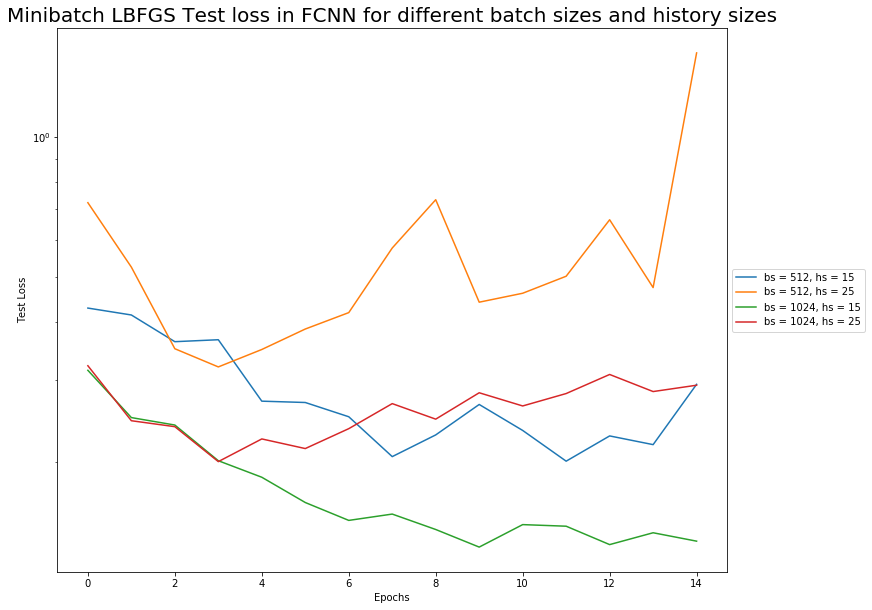

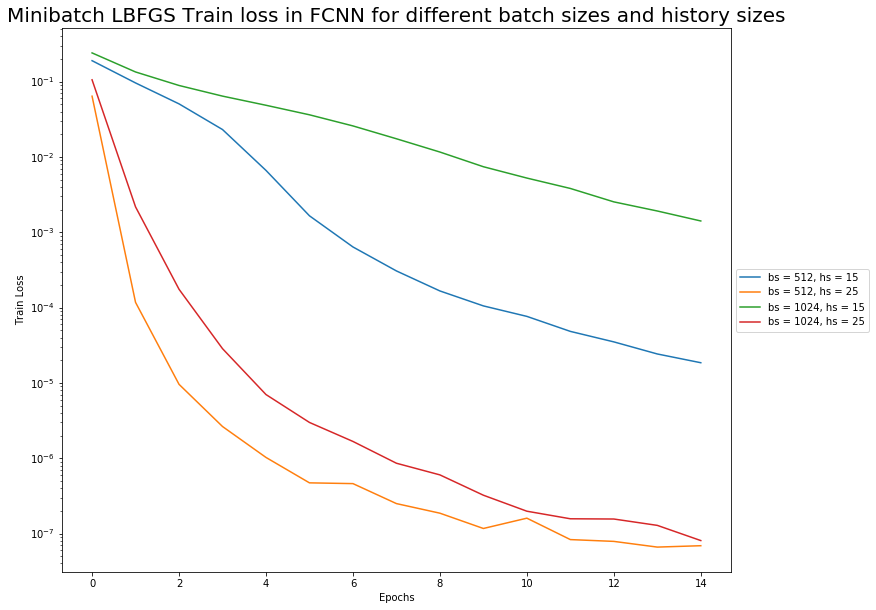

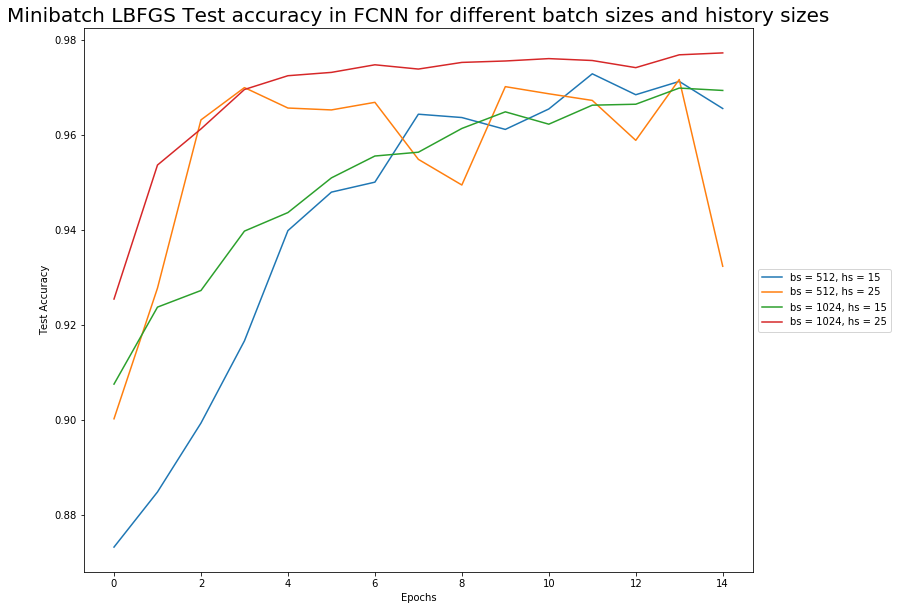

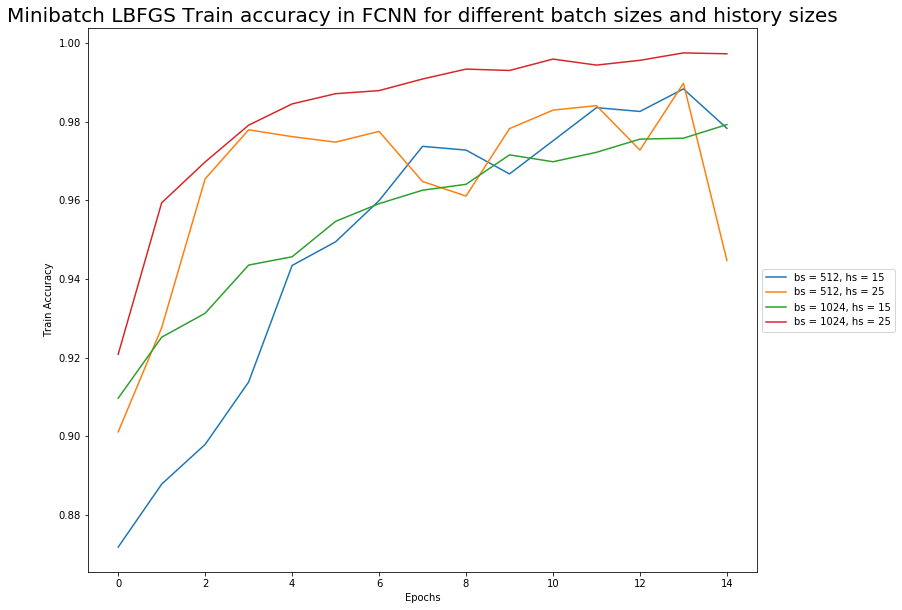

In [36]:
i=0
for bs_index,bs in enumerate(minibatch_size_grid):
    for hs_index,hs in enumerate(max_iter_grid):
        plt.figure(1, figsize = (12,10))
        plt.semilogy(results[3][i],label='bs = {}, hs = {}'.format(bs,hs))
        plt.figure(2, figsize = (12,10))
        plt.semilogy(results[1][i],label='bs = {}, hs = {}'.format(bs,hs))
        plt.figure(3, figsize = (12,10))
        plt.plot(results[4][i],label='bs = {}, hs = {}'.format(bs,hs))
        plt.figure(4, figsize = (12,10))
        plt.plot(results[2][i],label='bs = {}, hs = {}'.format(bs,hs))
        i=i+1



In [ ]:
plt.figure(1)
plt.xlabel('Epochs')
plt.ylabel('Test Loss')
plt.title('Minibatch LBFGS Test loss in FCNN for different batch sizes and history sizes',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("mini_LBFGS_new_test_loss_fcnn_1.jpg")
plt.figure (2)
plt.xlabel('Epochs')
plt.ylabel('Train Loss')
plt.title('Minibatch LBFGS Train loss in FCNN for different batch sizes and history sizes',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("mini_LBFGS_new_train_loss_fcnn_1.jpg")
plt.figure (3)
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.title('Minibatch LBFGS Test accuracy in FCNN for different batch sizes and history sizes',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("mini_LBFGS_new_test_acc_fcnn_1.jpg")
plt.figure (4)
plt.xlabel('Epochs')
plt.ylabel('Train Accuracy')
plt.title('Minibatch LBFGS Train accuracy in FCNN for different batch sizes and history sizes',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("mini_LBFGS_new_train_acc_fcnn_1.jpg")

In [37]:
np.savetxt('LBFGS_new_minibatch_fcNN_trainloss_1.txt', results[1])
np.savetxt('LBFGS_new_minibatch_fcNN_testloss_1.txt', results[3])
np.savetxt('LBFGS_new_minibatch_fcNN_trainacc_1.txt', results[2])
np.savetxt('LBFGS_new_minibatch_fcNN_testacc_1.txt', results[4])
np.savetxt('LBFGS_new_minibatch_fcNN_times_1.txt',results[5])